# Complexity Measures

This notebooks runs complexity metrics on time series signals. 

This notebook includes:
- Hjorth parameters
- Lempel-Ziv complexity
- Lyapunov exponent

In [1]:
import numpy as np

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from antropy import lziv_complexity

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims_load
from apm.run import run_sims_parallel as run_sims
from apm.methods import hjorth_activity, hjorth_mobility, hjorth_complexity, lempelziv, lyapunov
from apm.methods.settings import HJM_PARAMS, HJC_PARAMS, LZ_PARAMS, LY_PARAMS
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims
from apm.plts.settings import EXT, COLORS
from apm.sim.settings import (N_SIMS, EXP, EXPS, KNEES, FREQS, POWERS, BWS,
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE)
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Set the random seed
set_random_seed(111)

In [5]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '24_complexity'

In [6]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

## Hjorth Parameters 

Hjorth parameters are statistical properties that can be used to characterize EEG data.

The Hjorth measures are:
- activity: represents the signal power, computed as the variance of the time series
- mobility: represents the mean frequency of the power spectrum
- complexity: represents the change in frequency

In [7]:
# Check Hjorth measure parameters
print(HJM_PARAMS)
print(HJC_PARAMS)

{}
{}


### Compute Hjorth Parameters on Examples Signals

Note that the simulated signals are normalized to a variance of one, which is why the Hjorth activity is the same for all.

#### Powerlaw Signal

In [8]:
# Check the calculated Hjorth activity values across some example signals
print('Computed Hjorth activity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_activity(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_activity(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_activity(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_activity(SIG_KN)))

Computed Hjorth activity:
  powerlaw: 	 1.0000
  osc:      	 1.0000
  combined: 	 1.0000
  knee:     	 1.0000


In [9]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth mobility:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_mobility(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_mobility(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_mobility(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_mobility(SIG_KN)))

Computed Hjorth mobility:
  powerlaw: 	 0.1812
  osc:      	 0.1256
  combined: 	 0.3214
  knee:     	 0.5950


In [10]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth complexity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_complexity(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_complexity(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_complexity(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_complexity(SIG_KN)))

Computed Hjorth complexity:
  powerlaw: 	 8.1122
  osc:      	 1.0001
  combined: 	 4.5034
  knee:     	 2.4810


### Hjorth Parameters: Aperiodic Variations

In [11]:
# Run simulations calculating Hjorth measures across exponents
hjm_sims_exp, hjm_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, hjorth_mobility, HJM_PARAMS, 'update_exp', EXPS, N_SIMS)
hjc_sims_exp, hjc_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, hjorth_complexity, HJC_PARAMS, 'update_exp', EXPS, N_SIMS)

In [12]:
# Run simulations calculating Hjorth measures across exponents with an oscillation
hjm_sims_comb, hjm_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, HJM_PARAMS, 'update_comb_exp', EXPS, N_SIMS)
hjc_sims_comb, hjc_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, HJC_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

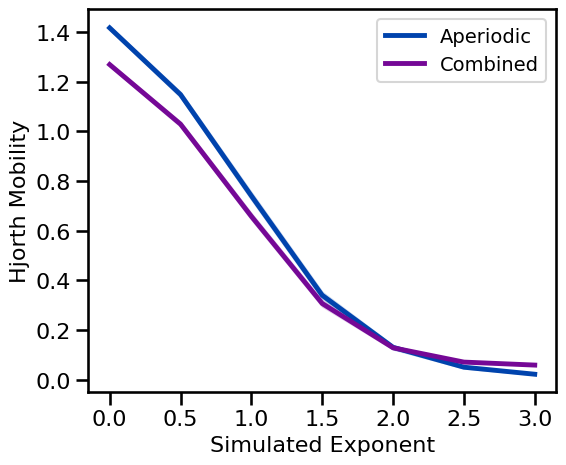

In [13]:
# Plot Hjorth mobility estimates across aperiodic variations
plot_ap_sims(hjm_sims_exp, hjm_sims_exp_var, hjm_sims_comb, hjm_sims_comb_var,
             'Hjorth Mobility', save_fig=SAVE_FIG, file_name='hjm_ap' + EXT, file_path=FIGPATH)

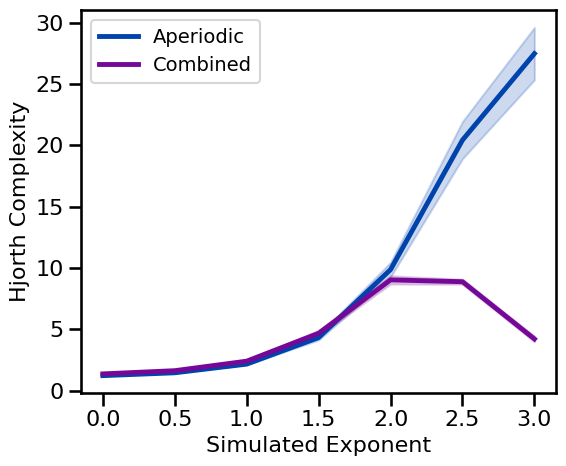

In [14]:
# Plot Hjorth complexity estimates across aperiodic variations
plot_ap_sims(hjc_sims_exp, hjc_sims_exp_var, hjc_sims_comb, hjc_sims_comb_var,
             'Hjorth Complexity', save_fig=SAVE_FIG, file_name='hjc_ap' + EXT, file_path=FIGPATH)

### Hjorth Parameters: Periodic Variations

In [15]:
# Run simulations calculating Hjorth estimates across oscillation frequency
hjm_sims_freq, hjm_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, HJM_PARAMS, 'update_freq', FREQS, N_SIMS)
hjc_sims_freq, hjc_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, HJC_PARAMS, 'update_freq', FREQS, N_SIMS)

In [16]:
# Run simulations calculating Hjorth estimates across oscillation power
hjm_sims_pow, hjm_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, HJM_PARAMS, 'update_pow', POWERS, N_SIMS)
hjc_sims_pow, hjc_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, HJC_PARAMS, 'update_pow', POWERS, N_SIMS)

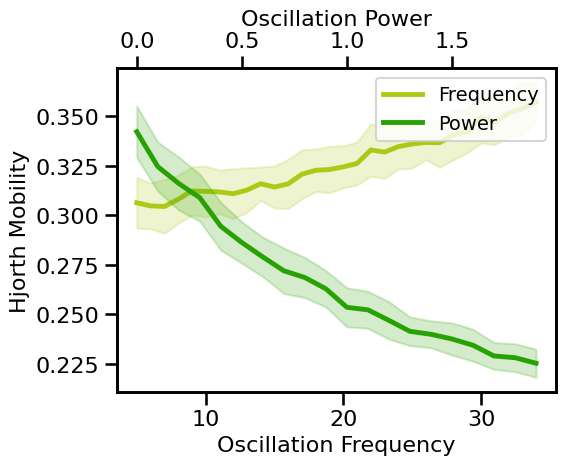

In [17]:
# Plot Hjorth mobility estimates across periodic variations
plot_pe_sims(hjm_sims_freq, hjm_sims_freq_var, hjm_sims_pow, hjm_sims_pow_var,
             'Hjorth Mobility', save_fig=SAVE_FIG, file_name='hjm_pe' + EXT, file_path=FIGPATH)

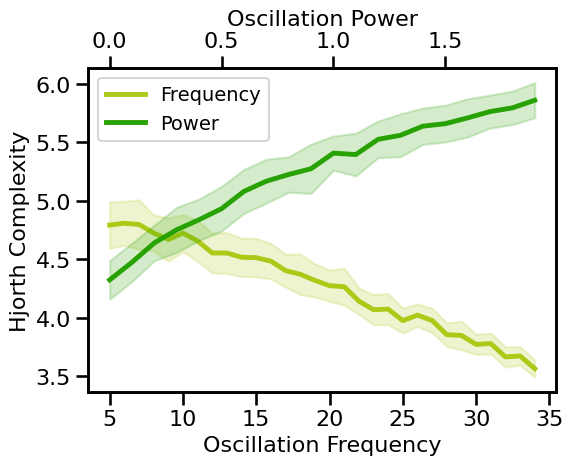

In [18]:
# Plot Hjorth complexity estimates across periodic variations
plot_pe_sims(hjc_sims_freq, hjc_sims_freq_var, hjc_sims_pow, hjc_sims_pow_var,
             'Hjorth Complexity', save_fig=SAVE_FIG, file_name='hjc_pe' + EXT, file_path=FIGPATH)

### Hjorth Parameters: Knee Variations

In [19]:
# Run simulations calculating Hjorth measures across different timescales
hjm_sims_knee, hjm_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, hjorth_mobility, HJM_PARAMS, 'update_knee', KNEES, N_SIMS)
hjc_sims_knee, hjc_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, hjorth_complexity, HJC_PARAMS, 'update_knee', KNEES, N_SIMS)

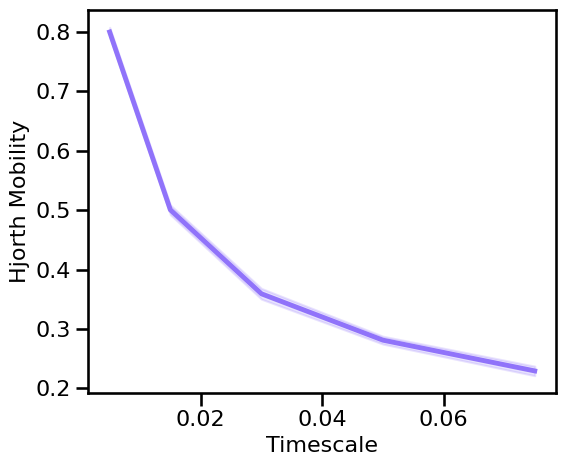

In [20]:
# Plot the estimated Hjorth Mobility across different timescales
plot_sims(KNEES, hjm_sims_knee, hjm_sims_knee_var,
          'Timescale', 'Hjorth Mobility', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='hjm_knee' + EXT, file_path=FIGPATH)

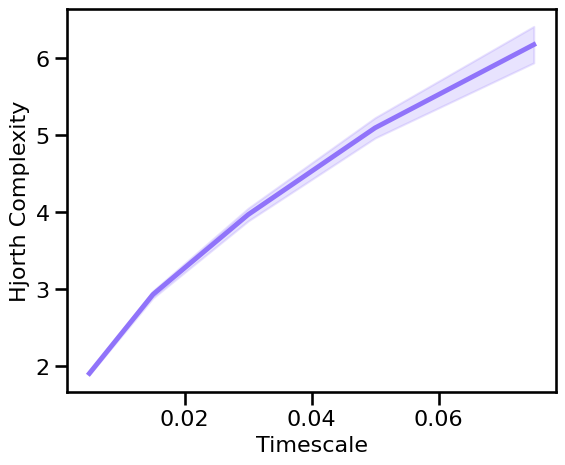

In [21]:
# Plot the estimated Hjorth Complexity across different timescales
plot_sims(KNEES, hjc_sims_knee, hjc_sims_knee_var,
          'Timescale', 'Hjorth Complexity', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='hjc_knee' + EXT, file_path=FIGPATH)

### Hjorth Parameters: Peak Variations

In [22]:
# Run simulations calculating Hjorth measures across peak bandwidth (sims from file)
hjm_sims_bw, hjm_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', hjorth_mobility, HJM_PARAMS)
hjc_sims_bw, hjc_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', hjorth_complexity, HJC_PARAMS)

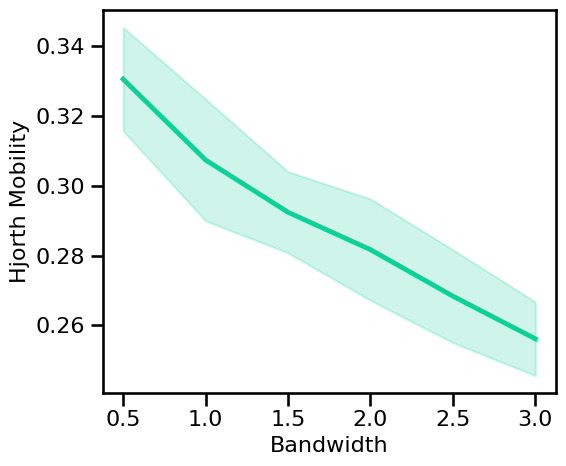

In [23]:
# Plot the Hjorth Mobility across peak bandwidth
plot_sims(BWS, hjm_sims_bw, hjm_sims_bw_var,
          'Bandwidth', 'Hjorth Mobility', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='hjm_bw' + EXT, file_path=FIGPATH)

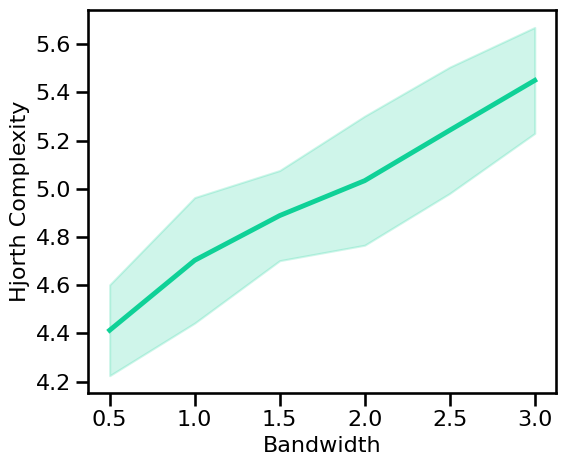

In [24]:
# Plot the Hjorth Complexity across peak bandwidth
plot_sims(BWS, hjc_sims_bw, hjc_sims_bw_var,
          'Bandwidth', 'Hjorth Complexity', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='hjc_bw' + EXT, file_path=FIGPATH)

## Lempel-Ziv Complexity

Lempel-Ziv (LZ) complexity is a measure of the complexity of a time series that is sometimes applied to EEG data. 

Note that the LZ algorithm is defined for binary sequences. 

To apply this measure to neural time series, we binarize the signal by calculating whether each point is above or below the median of the time series.

In [25]:
# Check Lempel-Ziv complexity parameters
LZ_PARAMS

{'normalize': False}

In [26]:
# Example of applying LZ complexity to a binarized signal
bin_sig = np.array(SIG_AP > np.median(SIG_AP)).astype(int)
lziv_complexity(bin_sig)

282

### Calculating Lempel-Ziv Complexity on Example Signals

In [27]:
# Check Lempel-Ziv complexity measures on example signals
print('Lempel-Ziv complexity:')
print('  powerlaw: \t {:5d}'.format(lempelziv(SIG_AP, **LZ_PARAMS)))
print('  osc:      \t {:5d}'.format(lempelziv(SIG_OSC, **LZ_PARAMS)))
print('  combined: \t {:5d}'.format(lempelziv(SIG_COMB, **LZ_PARAMS)))
print('  knee:     \t {:5d}'.format(lempelziv(SIG_KN, **LZ_PARAMS)))

Lempel-Ziv complexity:
  powerlaw: 	   282
  osc:      	     5
  combined: 	   452
  knee:     	   758


### Aperiodic Variations

In [28]:
# Run simulations calculating LZ complexity across exponents
lz_sims_exp, lz_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, lempelziv, LZ_PARAMS, 'update_exp', EXPS, N_SIMS)

In [29]:
# Run simulations calculating LZ complexity across exponents with an oscillation
lz_sims_comb, lz_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

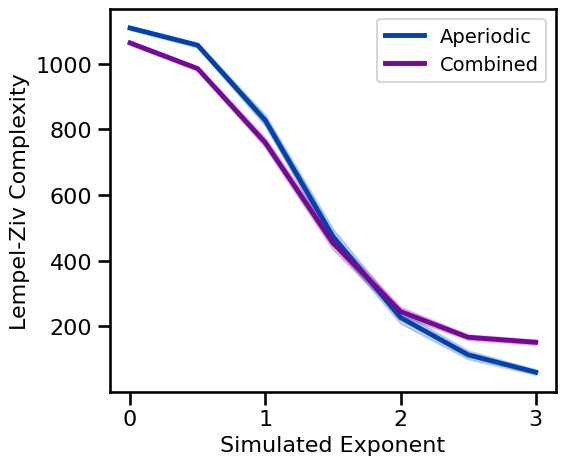

In [30]:
# Plot Lempel-Ziv complexity estimates across aperiodic variations
plot_ap_sims(lz_sims_exp, lz_sims_exp_var, lz_sims_comb, lz_sims_comb_var,
             'Lempel-Ziv Complexity', save_fig=SAVE_FIG, file_name='lz_ap' + EXT, file_path=FIGPATH)

### Periodic Variations

In [31]:
# Run simulations calculating LZ complexity across oscillation frequency
lz_sims_freq, lz_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS, 'update_freq', FREQS, N_SIMS)

In [32]:
# Run simulations calculating LZ complexity dimension across oscillation power
lz_sims_pow, lz_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS, 'update_pow', POWERS, N_SIMS)

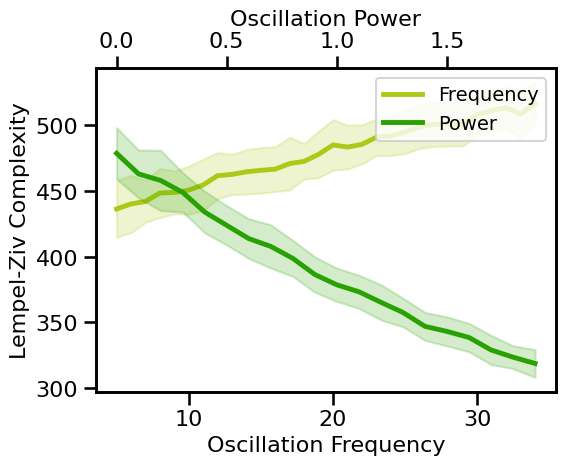

In [33]:
# Plot Lempel-Ziv complexity estimates across periodic variations
plot_pe_sims(lz_sims_freq, lz_sims_freq_var, lz_sims_pow, lz_sims_pow_var,
             'Lempel-Ziv Complexity', save_fig=SAVE_FIG, file_name='lz_pe' + EXT, file_path=FIGPATH)

### Knee Variations

In [34]:
# Run simulations calculating LZ Complexity across different timescales
lz_sims_knee, lz_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, lempelziv, LZ_PARAMS, 'update_knee', KNEES, N_SIMS)

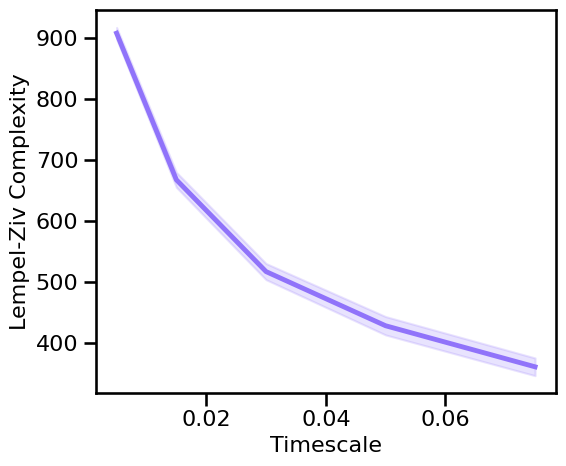

In [35]:
# Plot the estimated LZ Complexity across different timescales
plot_sims(KNEES, lz_sims_knee, lz_sims_knee_var,
          'Timescale', 'Lempel-Ziv Complexity', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='lz_knee' + EXT, file_path=FIGPATH)

### Bandwidth Variations

In [36]:
# Run simulations calculating LZ Complexity across peak bandwidth (sims from file)
lz_sims_bw, lz_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', lempelziv, LZ_PARAMS)

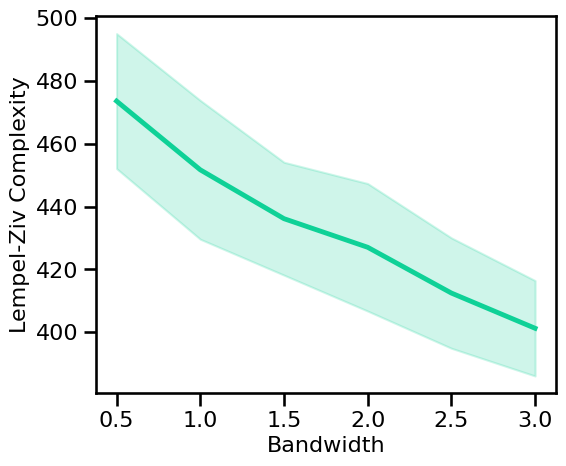

In [37]:
# Plot the estimated LZ Complexity across peak bandwidth
plot_sims(BWS, lz_sims_bw, lz_sims_bw_var,
          'Bandwidth', 'Lempel-Ziv Complexity', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='lz_bw' + EXT, file_path=FIGPATH)

## Lyapunov Exponent

In [38]:
# Check the calculated Lyapuniv exponent values across some example signals
print('Computed Lyapunov exponent:')
print('  powerlaw: \t {:1.4f}'.format(lyapunov(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(lyapunov(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(lyapunov(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(lyapunov(SIG_KN)))

Computed Lyapunov exponent:
  powerlaw: 	 0.1030
  osc:      	 -0.0000
  combined: 	 0.1142
  knee:     	 0.0916


In [45]:
# Since is an expensive computation, reset to run fewer number of sims
N_SIMS = 10
N_JOBS = 4

### Aperiodic Variations

In [40]:
# Run simulations calculating Lyapunov exponent across exponents
ly_sims_exp, ly_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, lyapunov, LY_PARAMS, 'update_exp', EXPS, N_SIMS, n_jobs=N_JOBS)

In [41]:
# Run simulations calculating Lyapunov exponent across exponents with an oscillation
ly_sims_comb, ly_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lyapunov, LY_PARAMS, 'update_comb_exp', EXPS, N_SIMS, n_jobs=N_JOBS)

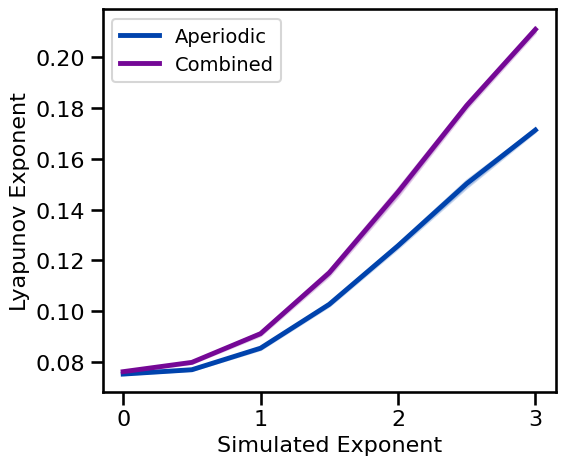

In [42]:
# Plot Lyapunov exponent estimates across aperiodic variations
plot_ap_sims(ly_sims_exp, ly_sims_exp_var, ly_sims_comb, ly_sims_comb_var,
             'Lyapunov Exponent', save_fig=SAVE_FIG, file_name='ly_ap' + EXT, file_path=FIGPATH)

### Periodic Variations

In [46]:
# Run simulations calculating Lyapunov exponent across oscillation frequency
ly_sims_freq, ly_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lyapunov, LY_PARAMS, 'update_freq', FREQS, N_SIMS, n_jobs=N_JOBS)

In [47]:
# Run simulations calculating Lyapunov exponent across oscillation power
ly_sims_pow, ly_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lyapunov, LY_PARAMS, 'update_pow', POWERS, N_SIMS, n_jobs=N_JOBS)

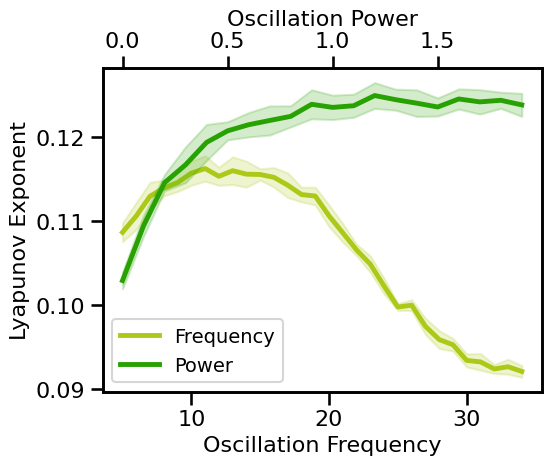

In [48]:
# Plot Lyapunov exponent estimates across periodic variations
plot_pe_sims(ly_sims_freq, ly_sims_freq_var, ly_sims_pow, ly_sims_pow_var,
             'Lyapunov Exponent', save_fig=SAVE_FIG, file_name='ly_pe' + EXT, file_path=FIGPATH)

### Knee Variations

In [49]:
# Run simulations calculating Lyapunov exponent across different timescales
ly_sims_knee, ly_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, lyapunov, LY_PARAMS, 'update_knee', KNEES, N_SIMS, n_jobs=N_JOBS)

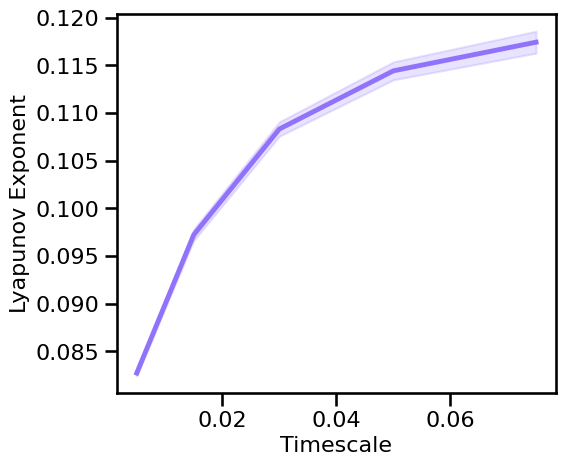

In [50]:
# Plot the estimated Lyapunov exponent across different timescales
plot_sims(KNEES, ly_sims_knee, ly_sims_knee_var,
          'Timescale', 'Lyapunov Exponent', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='ly_knee' + EXT, file_path=FIGPATH)

### Peak Variations

In [51]:
# Run simulations calculating Lyapunov exponent across peak bandwidth (sims from file)
ly_sims_bw, ly_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', lyapunov, LY_PARAMS)

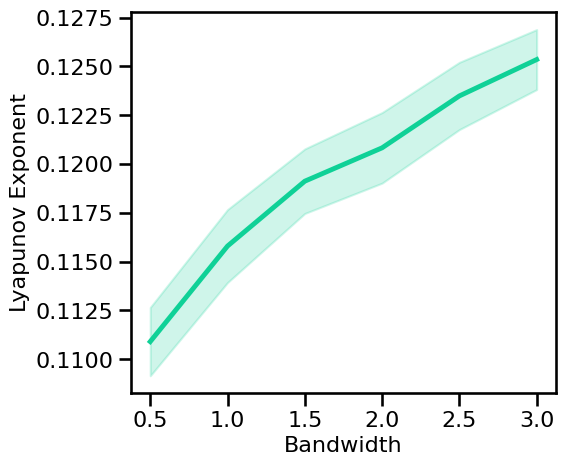

In [52]:
# Plot the estimated Lyapunov exponent across peak bandwidth
plot_sims(BWS, ly_sims_bw, ly_sims_bw_var,
          'Bandwidth', 'Lyapunov Exponent', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='ly_bw' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Hjorth Parameters:
- mobility increases with decreasing aperiodic exponent (non-linearly) & increases with oscillation frequency & power
- complexity decreases with decreasing aperiodic exponent (non-linearly) & decreases with oscillation frequency & power

Lempel-Ziv Complexity:
- increases with decreasing aperiodic exponent, non-linearly
- increases with increasing oscillation frequency, approximately linearly
- decreases with increasing oscillation power, approximately linearly

Lyapunov Exponent:
- decreases with decreasing aperiodic exponent, non-linearly
- increases to a point, then decreases, with increases oscillation frequency, non-linearly
- increases with increasing oscillation power, non-linearly